In [1]:
import pandas as pd
import numpy as np
from caits.loading import csv_loader_regression
from caits.dataset import RegressionDataset
from caits.transformers import FeatureExtractor, FunctionTransformer, FunctionTransformer2D
from caits.preprocessing import normalize_signal
from caits.filtering import filter_butterworth
from caits.fe import median_value, std_value, spectrogram
from sklearn.pipeline import Pipeline
from caits.visualization import plot_signal

In [2]:
data = csv_loader_regression("../examples/data/AirQuality.csv", X_cols=["C6H6(GT)", "NOx(GT)"], y_cols=[ "PT08.S4(NO2)" ,"PT08.S1(CO)"], sep=";", decimal=",")

rgr_data = RegressionDataset(**data)
rgr_data

rgr_data.X = [tmp.fillna(0) for tmp in rgr_data.X]
rgr_data.y = [tmp.fillna(0) for tmp in rgr_data.y]


In [3]:
normalize_tr = FunctionTransformer(normalize_signal)
butterworth_tr = FunctionTransformer(filter_butterworth, fs=100, filter_type="lowpass", cutoff_freq=0.5)
median_value_tr = FunctionTransformer(median_value)

test_pipeline = Pipeline([
    ("normalize", normalize_tr),
    ("butterworth", butterworth_tr),
])


In [4]:
transformed = test_pipeline.fit_transform(rgr_data)

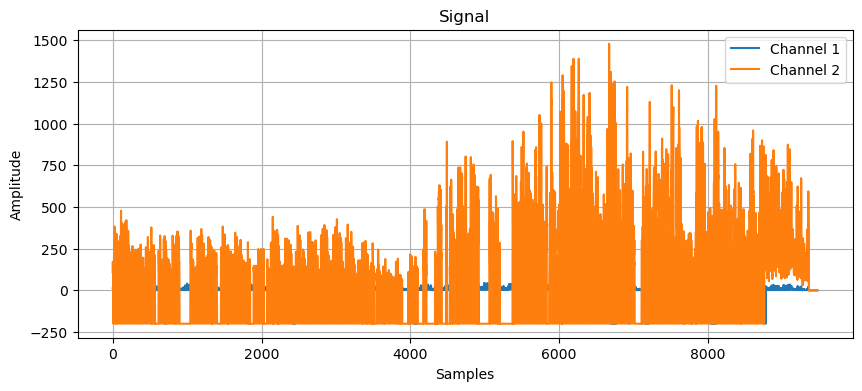

In [5]:
fig = plot_signal(rgr_data.to_numpy()[0])

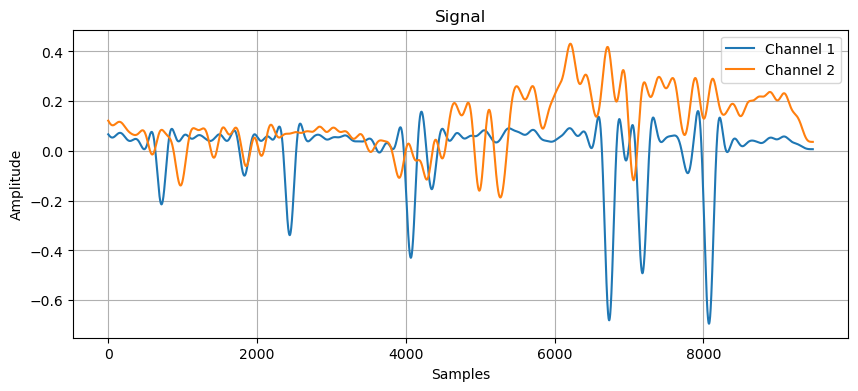

In [6]:
fig = plot_signal(transformed.to_numpy()[0])

In [7]:
rfe = FeatureExtractor([
    {
        "func": median_value,
        "params": {}
    },
    {
        "func": std_value,
        "params": {}
    }
])

In [8]:
rfe.fit_transform(rgr_data)

[               C6H6(GT)
median_value   7.800000
std_value     41.128716]
[               C6H6(GT)
median_value   7.800000
std_value     41.128716,                  NOx(GT)
median_value  139.000000
std_value     256.526027]


ValueError: X and y must have the same number of columns.

In [9]:
spectrogram_tr = FunctionTransformer2D(func=spectrogram, n_fft=100, hop_length=10)
spectrogram_tr.fit_transform(rgr_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.